## EXPERIMENT 1: MagFace

In [1]:
## Load libraries

import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import normalize
import sys
sns.set(style="white")
%matplotlib inline
sys.path.append('../../utils')
from Model_utils.Model_funcs import *
from Result_metric_utils.result_metrics import *
from Data_proc_utils.Data_proc_funcs import *
from DET_utils.DET_plots import *
from DET_utils.DET import *
from Plotting_stats_utils.plotting_threshold import *
from Plotting_stats_utils.stats_tables import *
from IPython import embed


In [ ]:
# Save figures
from matplotlib import pyplot as plt
save_fig_path = '../../figures/mag_2_1/'

### MagFace Results

This notebook loads the feature vectors from MagFace and run them through the results metrics:
FNIR, FPIR, FND, FPD, and GARBE

# Load data

In [2]:
feature_list_children = '../../data/data_full/feature_vectors/magface_feature_vectors/2.1/feature_vectors_from_children_filtered_bibel_FINAL_INFERENCE_finetuning_ex_2_1.list'
feature_list_adults = '../../data/data_full/feature_vectors/magface_feature_vectors/2.1/feature_vectors_from_adults_bibel_cropped_retina_all_finetuning_ex_2_1.list'

def load_and_compute_similarity(feature_list, dtype=np.float32):
    # Load data
    image_names, ids, num_ids, norm_feats = load_magface_vectors(feature_list)

    # Convert dtype to reduce memory usage
    norm_feats = norm_feats.astype(dtype)

    # Compute similarity matrix incrementally if possible
    sim_mat = np.dot(norm_feats, norm_feats.T)

    return image_names, ids, num_ids, sim_mat


In [3]:
# Load and compute for children
image_names_c, ids_c, num_ids_c, sim_mat_c = load_and_compute_similarity(feature_list_children)


/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_5.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_1.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_2.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_m.04n3v0_/m.04n3v0__0002.jpg
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_1.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_3.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_2.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_344/Asian_344_19.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_344/Asian_344_21.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_167/Caucasian_167_26.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_167/Caucasian_167_38.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_16

In [4]:

# Load and compute for adults
image_names_a, ids_a, num_ids_a, sim_mat_a = load_and_compute_similarity(feature_list_adults)


/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.02nrz2/m.02nrz2_0003.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.02nrz2/m.02nrz2_0001.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.02nrz2/m.02nrz2_0004.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.01241v/m.01241v_0002.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/African_m.05zn751/m.05zn751_0001.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/African_m.05zn751/m.05zn751_0002.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/African_m.05zn751/m.05zn751_0004.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.04n3v0_/m.04n3v0__0001.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.0kvkdqp/m.0kvkdqp_0001.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.0kvkdqp/m.0kvkdqp_0004.jpg
/data/data_full/adults_filtered_bib

In [5]:


# Dataframes with info, removes names not in magface results
children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_children_df_BIBEL.csv')
children_all = children_all[children_all.image_name.isin(image_names_c)]

adults_all_org = pd.read_csv('../../data/image_info_csvs/final_filtered_adults_df_BIBEL.csv')
adults_all = adults_all_org[adults_all_org.image_name.isin(image_names_a)]

# Find the threshold

In [ ]:
random_states = [1,2]
percentiles = np.arange(0.0, 1.0, 0.01).tolist()
df_all_threshold_x = compute_metrics_ex_1_1(random_states, percentiles, children_all, adults_all, image_names_c, image_names_a, sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE)


FPD result:  0.0
FND result:  0.37534546622171766
GARBE result, GARBE close to 1 means more unfair:  0.28150909966628823
Done for random_state: 1, percentile: 0.1
FPD result:  0.0
FND result:  0.3506047278724574
GARBE result, GARBE close to 1 means more unfair:  0.26295354590434306
Done for random_state: 1, percentile: 0.10800000000000001
FPD result:  0.0
FND result:  0.3591617076804901
GARBE result, GARBE close to 1 means more unfair:  0.2693712807603676
Done for random_state: 1, percentile: 0.11600000000000002
FPD result:  0.0
FND result:  0.33783246168764974
GARBE result, GARBE close to 1 means more unfair:  0.2533743462657373
Done for random_state: 1, percentile: 0.12400000000000003
FPD result:  0.0
FND result:  0.328502172946458
GARBE result, GARBE close to 1 means more unfair:  0.2463766297098435
Done for random_state: 1, percentile: 0.13200000000000003
FPD result:  0.0
FND result:  0.33579045670221314
GARBE result, GARBE close to 1 means more unfair:  0.25184284252665984
Done fo

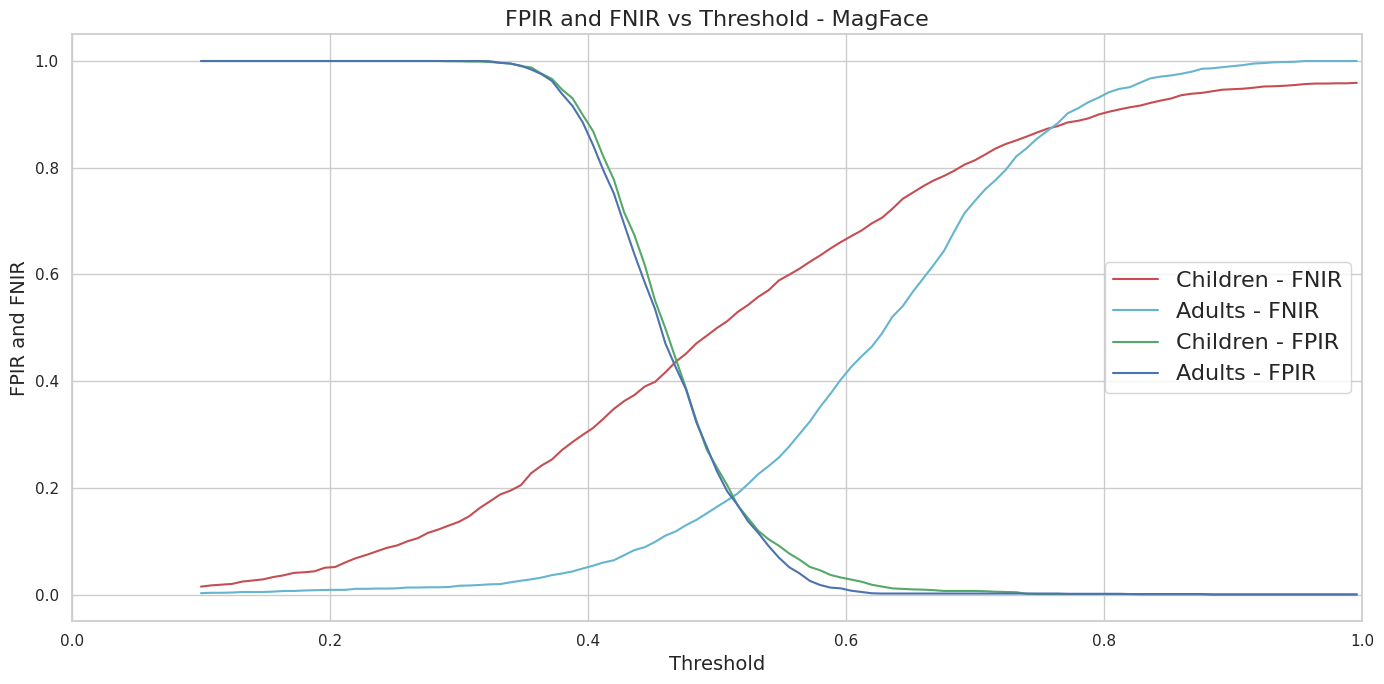

In [10]:

plot_threshold_metrics_ex_1_1_together(df_all_threshold_x,  'MagFace ex. 2.1', save_fig_path)

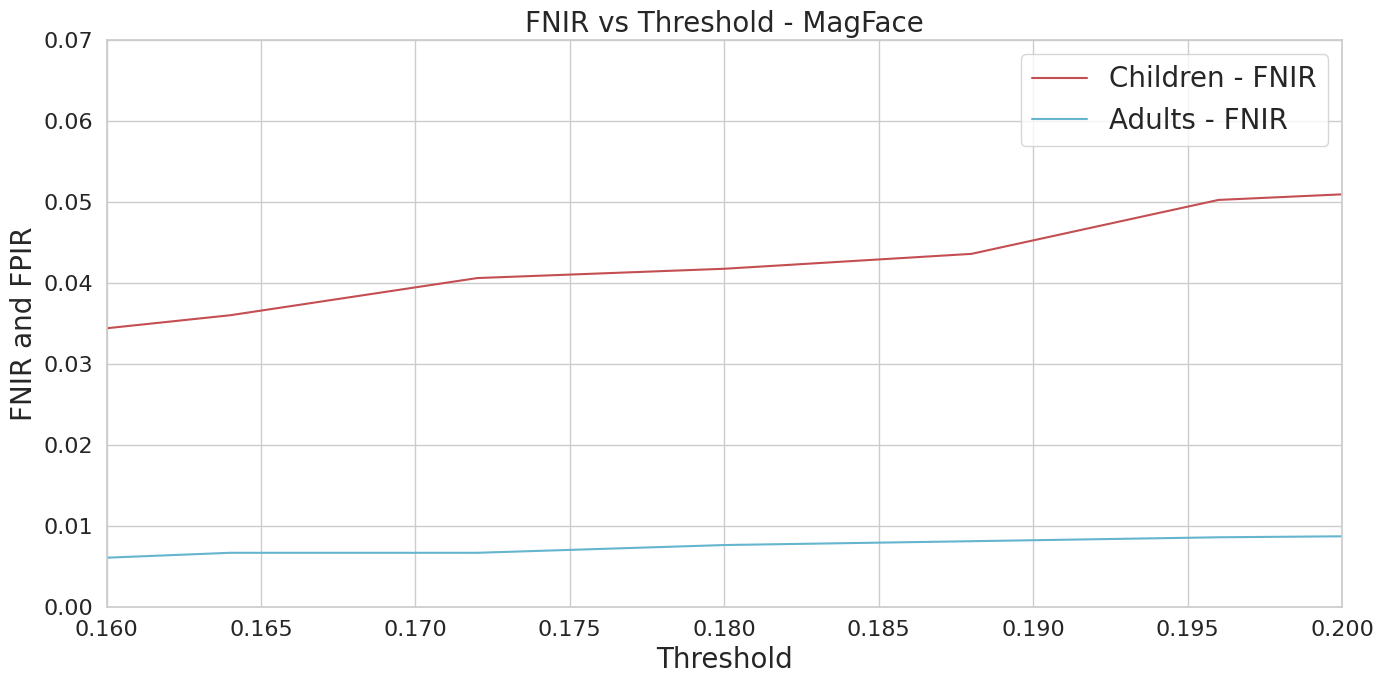

In [11]:
def plot_threshold_metrics_ex_1_1_zoomed(df_all_threshold_x):
    # Set the aesthetics for the plots
    sns.set(style="whitegrid")

    plot_df = df_all_threshold_x.groupby('Threshold').mean()

    plt.figure(figsize=(14, 7))
    plt.plot(plot_df.index, plot_df['FNIR_c'], 'r-', label='Children - FNIR')
    plt.plot(plot_df.index, plot_df['FNIR_a'], 'c-', label='Adults - FNIR')
    plt.xlabel('Threshold', fontsize=20)
    plt.ylabel('FNIR and FPIR', fontsize=20)
    plt.title('FNIR vs Threshold - MagFace', fontsize=20)
    plt.ylim(0.0, 0.07)  # Limit the FNIR y-axis
    plt.xlim(0.16, 0.20)
    plt.legend(fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True)

    plt.tight_layout()

    # Show the plot
    plt.show()
plot_threshold_metrics_ex_1_1_zoomed(df_all_threshold_x)

### the threshold should be 0.194

# Stats - 10 experiments

In [8]:

random_states = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

df_all_results, sim_mat_dict_all_magface_ex1_1 = evaluate_metrics_ex_1_1(
    random_states, children_all, adults_all, image_names_c, image_names_a,
    sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data,
    balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, remove_ones, df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
)


FPD result:  0.0
FND result:  0.2872729020474863
GARBE result, GARBE close to 1 means more unfair:  0.21545467653561473
done


In [ ]:
# Generate the LaTeX table
latex_table = generate_latex_table(df_all_results.applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)


In [ ]:
latex_table = generate_latex_table(df_all_results.describe().applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)

# Gemmer simscores

In [15]:
df_all_results.to_csv('results_10_experiment_2_1_magface.csv')

In [9]:
# Add together all

# make one  big array out of all arays named f'sim_mat_dict_all_magface_ex1_1['sim_mat_c_enrolled_iteration_{i}']' for i from 1 to 10
# List to hold all the arrays
sim_mat_c_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(11, 21):
    key = f'sim_mat_c_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_c_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

# Concatenate all arrays into one big array
sim_mat_c_enrolled_iterations_all = np.concatenate(sim_mat_c_enrolled_iterations)
sim_mat_c_enrolled_iterations_all = pd.DataFrame(sim_mat_c_enrolled_iterations_all)
sim_mat_c_enrolled_iterations_all.to_csv('sim_mat_c_enrolled_iterations_all_2_1_mag.csv', index=False)
# Print the big array
print(len(sim_mat_c_enrolled_iterations_all))



# Add together all

# make one  big array out of all arays named f'sim_mat_dict_all_magface_ex1_1['sim_mat_c_enrolled_iteration_{i}']' for i from 1 to 10

# List to hold all the arrays
sim_mat_a_enrolled_iterations = []

# Loop to access each array and append it to the list
# for i in range(1, 11):
for i in range(11, 21):
    key = f'sim_mat_a_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_a_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

# Concatenate all arrays into one big array
sim_mat_a_enrolled_iterations_all = np.concatenate(sim_mat_a_enrolled_iterations)
sim_mat_a_enrolled_iterations_all = pd.DataFrame(sim_mat_a_enrolled_iterations_all)
sim_mat_a_enrolled_iterations_all.to_csv('sim_mat_a_enrolled_iterations_all_2_1_mag.csv', index=False)


# Print the big array
print(len(sim_mat_a_enrolled_iterations_all))


12576
4224


In [10]:
# Add together all

# make one  big array out of all arays named f'sim_mat_dict_all_magface_ex1_1['sim_mat_c_enrolled_iteration_{i}']' for i from 1 to 10

# List to hold all the arrays
sim_mat_c_non_enrolled_iterations = []

# Loop to access each array and append it to the list
# for i in range(1, 11):
for i in range(11, 21):
    key = f'sim_mat_c_non_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_c_non_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

sim_mat_c_non_enrolled_iterations_all = np.concatenate(sim_mat_c_non_enrolled_iterations)
sim_mat_c_non_enrolled_iterations_all = pd.DataFrame(sim_mat_c_non_enrolled_iterations_all)
sim_mat_c_non_enrolled_iterations_all.to_csv('sim_mat_c_non_enrolled_iterations_all_2_1_mag.csv', index=False)
# Print the big array
print(len(sim_mat_c_non_enrolled_iterations_all))


# Add together all

# make one  big array out of all arays named f'sim_mat_dict_all_magface_ex1_1['sim_mat_c_enrolled_iteration_{i}']' for i from 1 to 10

# List to hold all the arrays
sim_mat_a_non_enrolled_iterations = []

# Loop to access each array and append it to the list
# for i in range(1, 11):
for i in range(11, 21):
    key = f'sim_mat_a_non_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_a_non_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

sim_mat_a_non_enrolled_iterations_all = np.concatenate(sim_mat_a_non_enrolled_iterations)
sim_mat_a_non_enrolled_iterations_all = pd.DataFrame(sim_mat_a_non_enrolled_iterations_all)
sim_mat_a_non_enrolled_iterations_all.to_csv('sim_mat_a_non_enrolled_iterations_all_2_1_mag.csv', index=False)

# Print the big array
print(len(sim_mat_a_non_enrolled_iterations_all))


3199373
3170460


# Loading pre-saved stuff

In [18]:
sim_mat_c_enrolled_iterations_all = (pd.read_csv('sim_mat_c_enrolled_iterations_all_2_1_mag.csv')).values.flatten()
sim_mat_a_enrolled_iterations_all = (pd.read_csv('sim_mat_a_enrolled_iterations_all_2_1_mag.csv')).values.flatten()
sim_mat_c_non_enrolled_iterations_all = (pd.read_csv('sim_mat_c_non_enrolled_iterations_all_2_1_mag.csv')).values.flatten()
sim_mat_a_non_enrolled_iterations_all = (pd.read_csv('sim_mat_a_non_enrolled_iterations_all_2_1_mag.csv')).values.flatten()


In [19]:
from scipy.stats import describe, gaussian_kde
import math

def descriptive_statistics(mated_scores, nonmated_scores):
    stats_labels = ["Observations", "Minimum", "Maximum", "Mean", "St. Dev.", "Skewness", "Ex. Kurtosis"]
    mated_stats = describe(mated_scores)
    mated_stats = [mated_stats.nobs, mated_stats.minmax[0], mated_stats.minmax[1], mated_stats.mean, math.sqrt(mated_stats.variance), mated_stats.skewness, mated_stats.kurtosis]
    nonmated_stats = describe(nonmated_scores)
    nonmated_stats = [nonmated_stats.nobs, nonmated_stats.minmax[0], nonmated_stats.minmax[1], nonmated_stats.mean, math.sqrt(nonmated_stats.variance), nonmated_stats.skewness, nonmated_stats.kurtosis]

    stats_system_df = pd.DataFrame(np.array([stats_labels, mated_stats, nonmated_stats]).T, columns=["Statistic", "Mated", "Non-mated"])
    stats_system_df = stats_system_df.astype({"Statistic": str, "Mated": float, "Non-mated": float})
    return stats_system_df

In [20]:
mated_scores1 = sim_mat_a_enrolled_iterations_all
nonmated_scores1 = sim_mat_a_non_enrolled_iterations_all
scores_type1 = "similarity"
stats_system1_df = descriptive_statistics(mated_scores1, nonmated_scores1)
display(stats_system1_df)

,Statistic,Mated,Non-mated
0,Observations,41822.000000,3.260317e+07
1,Minimum,-0.069577,-4.553997e-01
2,Maximum,0.967829,9.325352e-01
3,Mean,0.648337,8.722053e-02
4,St. Dev.,0.130688,1.024774e-01
5,Skewness,-0.865896,1.680885e-01
6,Ex. Kurtosis,2.414170,1.920130e-01


In [21]:
mated_scores2 = sim_mat_c_enrolled_iterations_all
nonmated_scores2 = sim_mat_c_non_enrolled_iterations_all
scores_type2 = "similarity"
stats_system2_df = descriptive_statistics(mated_scores2, nonmated_scores2)
display(stats_system2_df)

,Statistic,Mated,Non-mated
0,Observations,124748.000000,3.287300e+07
1,Minimum,-0.097652,-4.763693e-01
2,Maximum,0.997552,9.999374e-01
3,Mean,0.524316,5.045138e-02
4,St. Dev.,0.179281,1.150694e-01
5,Skewness,-0.142249,1.386887e-01
6,Ex. Kurtosis,-0.267492,2.726840e-02


In [22]:
mated_colour = "green"
mated_label = "Mated scores"
nonmated_colour = "red"
nonmated_label = "Non-mated scores"

figure_size = (12,6)
alpha_shade = 0.25
alpha_fill = 1.0
linewidth = 2
legend_loc = "upper left"
legend_anchor = (1.0, 1.02)
legend_cols = 1
legend_fontsize = 16
label_fontsize = 20

threshold_colour = "black"
threshold_style = "--"
round_digits = 5
sns.set(style="white", palette="muted", color_codes=True)
plt.rc("axes", axisbelow=True)

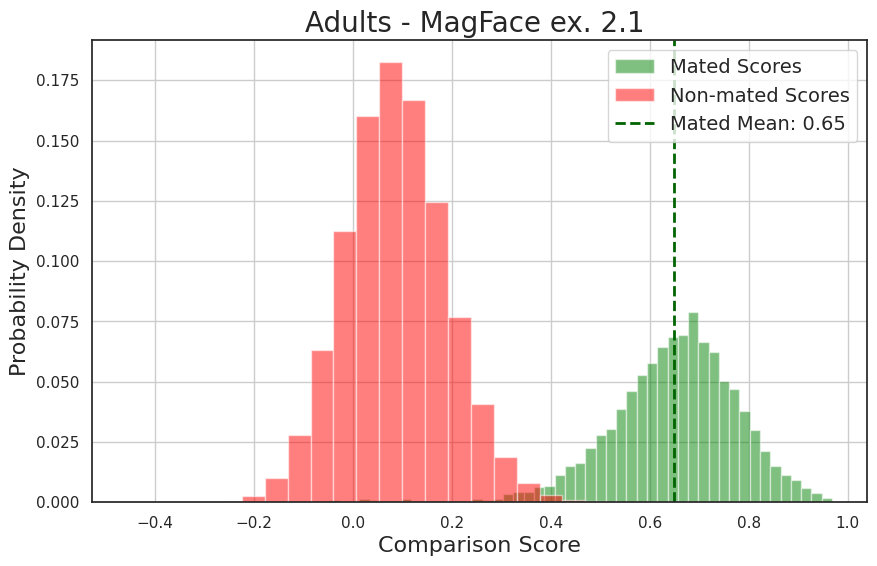

In [23]:

plot_histogram(mated_scores1, nonmated_scores1, normalise=True, title = 'Adults - MagFace ex. 2.1 ')


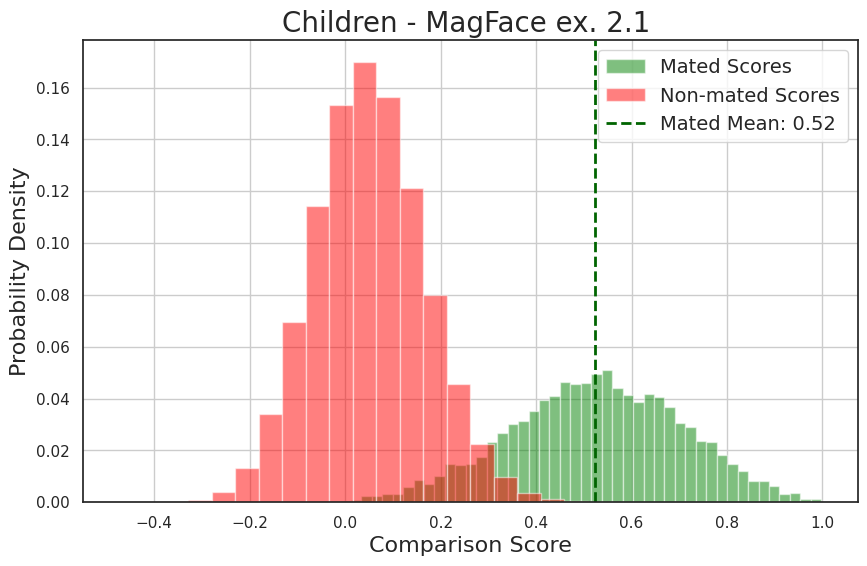

In [24]:
plot_histogram(mated_scores2, nonmated_scores2, normalise=True, title = 'Children - MagFace ex. 2.1 ')


# DET curves

In [25]:
d_prime_system1 = d_prime(mated_scores1, nonmated_scores1)
print("d' child =", round(d_prime_system1, round_digits))

d_prime_system2 = d_prime(mated_scores2, nonmated_scores2)
print("d' adult =", round(d_prime_system2, round_digits))

# d_prime_system3 = d_prime(mated_scores3, nonmated_scores3)
# print("d' canonical =", round(d_prime_system3, round_digits))


d' child = 4.77822
d' adult = 3.14576


In [26]:
# figure_size = (12,7)
# alpha_shade = 0.25
# alpha_fill = 1.0
# linewidth = 2
# legend_loc = "upper left"
# legend_anchor = (1.0, 1.02)
# legend_cols = 1
# legend_fontsize = 18
# label_fontsize = 18
# tick_fontsize = 18

# def kde_with_threshold(mated_scores, nonmated_scores, scores_type, threshold, savename=None):
#     linspace_items = 101
#     mated_kde, mated_pos, mated_min, mated_max = get_kde(mated_scores, linspace_items)
#     nonmated_kde, nonmated_pos, nonmated_min, nonmated_max = get_kde(nonmated_scores, linspace_items)

#     plt.figure(figsize=figure_size)
#     plt.xlabel("Comparison Score", size=label_fontsize)
#     plt.ylabel("Probability Density", size=label_fontsize)

#     def compute_fills(scores_type, mated_min, mated_max, nonmated_min, nonmated_max, linspace_items):
#         if scores_type == "similarity":
#             if mated_min < threshold:
#                 mated_shade = np.linspace(threshold, mated_max, linspace_items)
#                 mated_fill = np.linspace(mated_min, threshold, linspace_items)
#             else:
#                 mated_shade = np.linspace(mated_min, mated_max, linspace_items)
#                 mated_fill = None
#             if nonmated_max > threshold:
#                 nonmated_shade = np.linspace(nonmated_min, threshold, linspace_items)
#                 nonmated_fill = np.linspace(threshold, nonmated_max, linspace_items)
#             else:
#                 nonmated_shade = np.linspace(nonmated_min, nonmated_max, linspace_items)
#                 nonmated_fill = None
#         elif scores_type == "dissimilarity":
#             if mated_max > threshold:
#                 mated_shade = np.linspace(mated_min, threshold, linspace_items)
#                 mated_fill = np.linspace(threshold, mated_max, linspace_items)
#             else:
#                 mated_shade = np.linspace(mated_min, mated_max, linspace_items)
#                 mated_fill = None
#             if nonmated_min < threshold:
#                 nonmated_shade = np.linspace(threshold, nonmated_max, linspace_items)
#                 nonmated_fill = np.linspace(nonmated_min, threshold, linspace_items)
#             else:
#                 nonmated_shade = np.linspace(nonmated_min, nonmated_max, linspace_items)
#                 nonmated_fill = None
#         else:
#             raise ValueError(f"Unknown type of comparison scores: {scores_type}")
#         return mated_shade, mated_fill, nonmated_shade, nonmated_fill

#     plt.plot(mated_pos, mated_kde(mated_pos), linewidth=linewidth, color=mated_colour, label=mated_label)
#     plt.plot(nonmated_pos, nonmated_kde(nonmated_pos), linewidth=linewidth, color=nonmated_colour, label=nonmated_label)

#     mated_shade, mated_fill, nonmated_shade, nonmated_fill = compute_fills(scores_type, mated_min, mated_max, nonmated_min, nonmated_max, linspace_items)

#     plt.fill_between(mated_shade, mated_kde(mated_shade), alpha=alpha_shade, color=mated_colour)
#     plt.fill_between(nonmated_shade, nonmated_kde(nonmated_shade), alpha=alpha_shade, color=nonmated_colour)

#     if mated_fill is not None:
#         plt.fill_between(mated_fill, mated_kde(mated_fill), alpha=alpha_fill, color=mated_colour)
#     if nonmated_fill is not None:
#         plt.fill_between(nonmated_fill, nonmated_kde(nonmated_fill), alpha=alpha_fill, color=nonmated_colour)

#     plt.axvline(threshold, linewidth=linewidth, linestyle=threshold_style, color=threshold_colour, label="Decision th")

#     plt.legend(loc=0)
#     red_patch = mpatches.Patch(color=nonmated_colour, alpha=alpha_fill, label='False positives')
#     green_patch = mpatches.Patch(color=mated_colour, alpha=alpha_fill, label='False negatives')
#     shaded_red_patch = mpatches.Patch(color=nonmated_colour, alpha=alpha_shade, label='True negatives')
#     shaded_green_patch = mpatches.Patch(color=mated_colour, alpha=alpha_shade, label='True positives')
#     current_handles, _ = plt.gca().get_legend_handles_labels()

#     plt.grid(True)
#     plt.legend(loc='upper right', bbox_to_anchor=legend_anchor, ncol=legend_cols, fontsize=legend_fontsize, handles=[green_patch, red_patch, shaded_green_patch, shaded_red_patch]+current_handles)
#     plt.xlim(-0.1, 1)
#     plt.ylim(0, None)
#     plt.xticks(fontsize=tick_fontsize)
#     plt.yticks(fontsize=tick_fontsize)

#     if savename is not None:
#         plt.savefig(savename, bbox_inches="tight")
#         plt.cla()
#         plt.clf()
#         plt.close()
#     else:
#         plt.show()


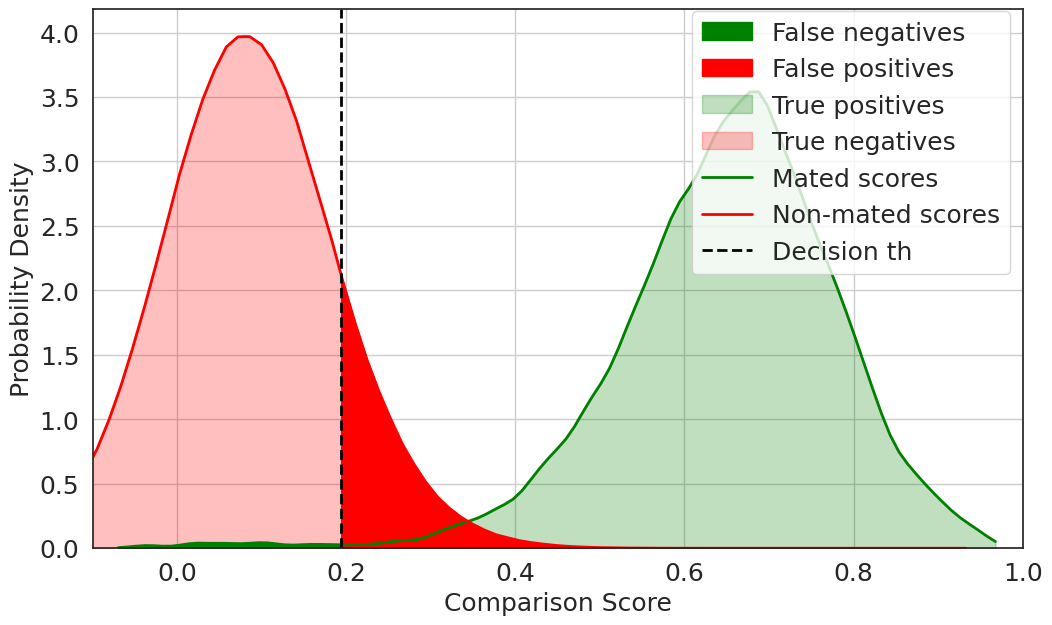

In [27]:
threshold1 = df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
kde_with_threshold(mated_scores1, nonmated_scores1, scores_type1, threshold1)

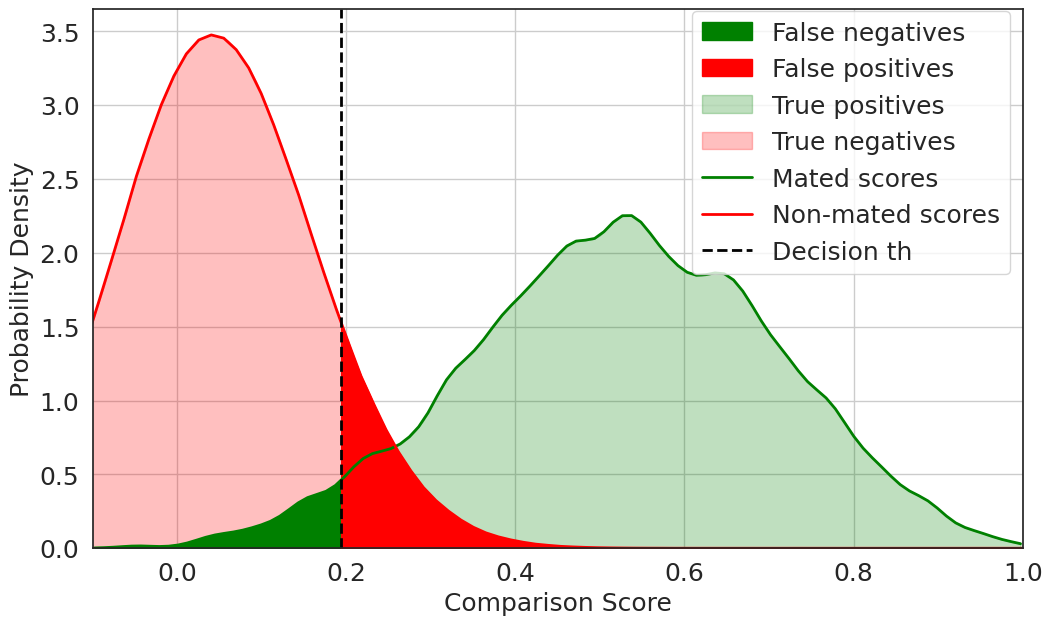

In [28]:
threshold2 = df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
kde_with_threshold(mated_scores2, nonmated_scores2, scores_type2, threshold2)

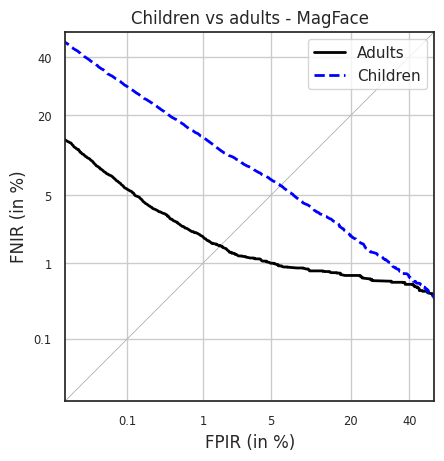

In [29]:
figure_size = (12,7)
alpha_shade = 0.25
alpha_fill = 1.0
linewidth = 2
legend_loc = "upper left"
legend_anchor = (1.0, 1.02)
legend_cols = 1
legend_fontsize = 18
label_fontsize = 18
tick_fontsize = 18


system_name1 = 'Adults'
system_name2 = 'Children'

det = DET(biometric_evaluation_type='identification', abbreviate_axes=True, plot_eer_line=True, plot_title="Children vs adults - MagFace")
det.x_limits = np.array([1e-4, .5])
det.y_limits = np.array([1e-4, .5])
det.x_ticks = np.array([1e-3, 1e-2, 5e-2, 20e-2, 40e-2])
det.x_ticklabels = np.array(['0.1', '1', '5', '20', '40'])
det.y_ticks = np.array([1e-3, 1e-2, 5e-2, 20e-2, 40e-2])
det.y_ticklabels = np.array(['0.1', '1', '5', '20', '40'])
det.create_figure()
det.plot(tar=adjust_scores_for_DET(mated_scores1, scores_type1), non=adjust_scores_for_DET(nonmated_scores1, scores_type1), label=system_name1)
det.plot(tar=adjust_scores_for_DET(mated_scores2, scores_type2), non=adjust_scores_for_DET(nonmated_scores2, scores_type2), label=system_name2)
det.legend_on(loc="upper right")
# det.xticks(fontsize=tick_fontsize)
# det.yticks(fontsize=tick_fontsize)
det.show()